In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255, X_test / 255

In [28]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 550us/step - loss: 0.2953 - accuracy: 0.9138 - val_loss: 0.1323 - val_accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 1s 470us/step - loss: 0.1462 - accuracy: 0.9572 - val_loss: 0.1063 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 1s 463us/step - loss: 0.1094 - accuracy: 0.9664 - val_loss: 0.0914 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 1s 459us/step - loss: 0.0901 - accuracy: 0.9730 - val_loss: 0.0796 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0741 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0760 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 1s 462us/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0695 -

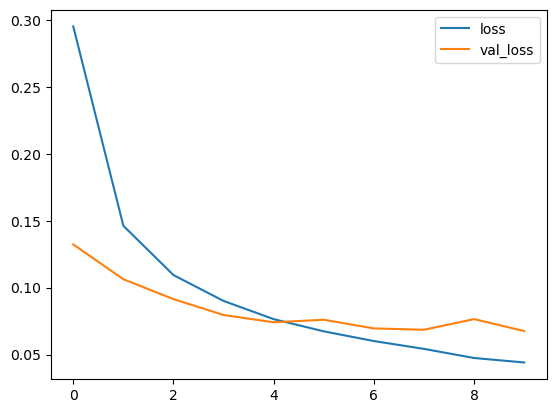

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

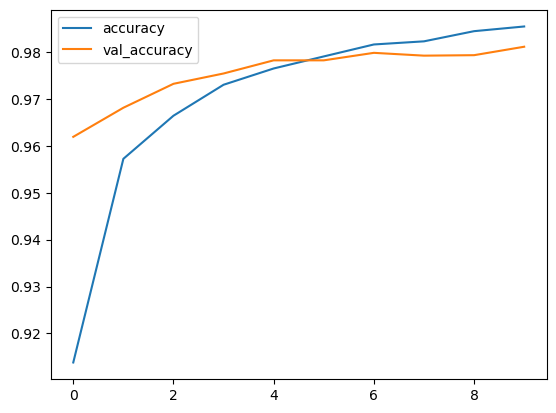

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 405us/step - loss: 0.0676 - accuracy: 0.9811


[0.06756468117237091, 0.9811000227928162]

In [41]:
y_hat = model.predict(X_test)

313/313 [==============================] - 0s 237us/step


Confusion matrix, without normalization
[[ 971    0    1    1    0    0    4    1    2    0]
 [   0 1126    3    1    0    0    1    0    4    0]
 [   6    2 1008    2    3    0    3    4    4    0]
 [   0    0    3  989    0    8    0    4    2    4]
 [   0    0    2    0  967    0    6    1    2    4]
 [   2    0    0    7    1  875    4    1    2    0]
 [   3    3    0    1    2    2  947    0    0    0]
 [   1    3   10    2    0    0    0 1006    2    4]
 [   3    0    4    8    3    6    1    4  942    3]
 [   1    5    0    2   10    3    0    6    2  980]]


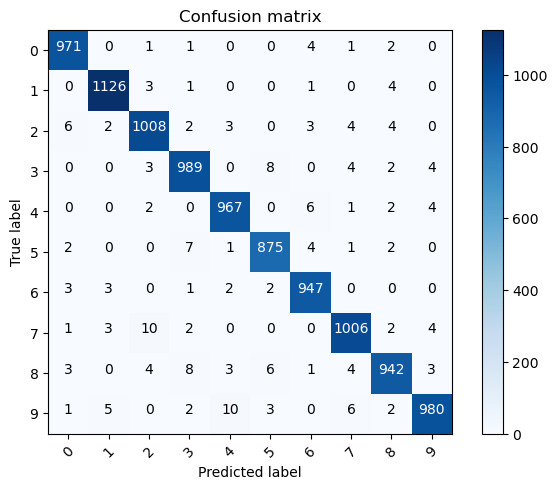

In [ ]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')

    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black',
        )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = y_hat.argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7, Predicted: 2')

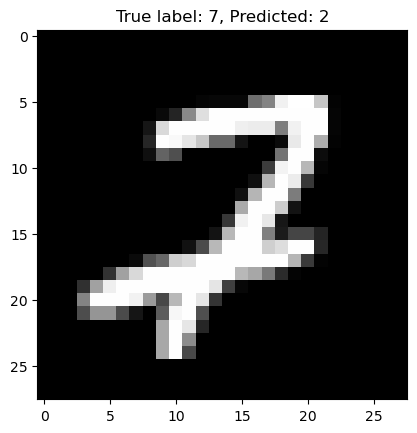

In [54]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)

plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]}, Predicted: {p_test[i]}')